<a href="https://colab.research.google.com/github/AbhishekJoshi93/SentimentAnalysis/blob/master/SentimentAnalysisForRacistTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist sentiment associated with it. So, the task is to classify racist tweets from other tweets.

# **Dataset**
Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist and label '0' denotes the tweet is not racist, your objective is to predict the labels on the test dataset. 

# **Import**

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Upload Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
from google.colab import files
uploaded_test = files.upload()

Saving test.csv to test.csv


In [5]:
import io
train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
train_original = train.copy()
test = pd.read_csv(io.StringIO(uploaded_test['test.csv'].decode('utf-8')))
test_original = test.copy()

# **Overview Of Dataset**
**Train** -> We have 3 attributes present in our dataset and a total of 31962 labeled tweets.


1.   ID
2.   Label
3.   Tweets



**Test** -> We have 2 attributes present in our dataset and a total of 17197 labeled tweets.


1.   ID
2.   Tweets



In [6]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


# **Combine**
Pandas dataframe.append() function is used to append rows of other dataframe to the end of the given dataframe, returning a new dataframe object.

In [8]:
combine = train.append(test,ignore_index=True,sort=True)

# **Pattern Function**

In [9]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes pattern from the tweet
    for i in r:
        text = re.sub(i,"",text)
    
    return text

# **Removing Twitter Handles**

Here NumPy Vectorization ‘**np.vectorize()**’ is used because it is much more faster than the conventional for loops when working on datasets of medium to large sizes.

In [10]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

## **Removing Punctuation, Numbers And Special Characters**

Here '**str.replace()**' is used to convert the punctuation, number and special characters with white space.

In [11]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

# **Removing Stop Words**

Here '**lambda**'(The expression is evaluated and returned) and '**join()**' is used to string from evaluated object.

In [12]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# **Tokenization**
Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens. We tokenize our tweets because we will apply Stemming in the next step.

In [13]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

# **Stemming**
Stemming is a process of stripping the suffixes from a tokenized tweet.

In [14]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [15]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

# **Combining Back To Tweet**

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [17]:
combine['Tidy_Tweets'] = tokenized_tweet

# **Word Cloud**

In [18]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

# **Separating Words**

In [19]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

# **Making Mask**

In [20]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

In [21]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc2 = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# **Plot Word Cloud Positive Word**

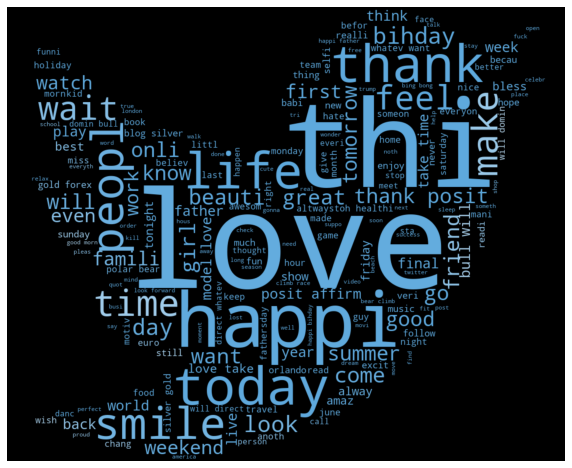

In [22]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

# **Plot Word Cloud Negative Word**

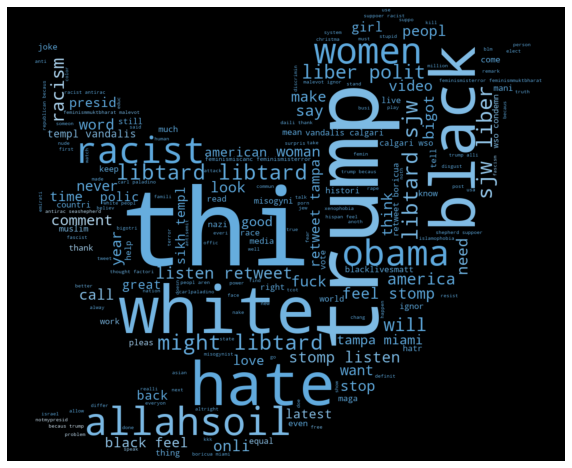

In [23]:
plt.figure(figsize=(10,20))
plt.imshow(wc2.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

# **Extract Hashtags**

In [24]:
def Hashtags_Extract(x):
    hashtags=[]
    
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

# **Positive Hashtags**

In [26]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])
ht_positive_unnest = sum(ht_positive,[])

# **Negative Hashtags**

In [27]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])
ht_negative_unnest = sum(ht_negative,[])